# Pandas Exercises
## Jorge Esteban Rojas Toro - 1014273955

### Task 1: Data Inspection
- Display the first 10 rows of the dataset.
- Count the unique values in the `NivelAprobacion` column.

### Task 2: Data Filtering
- Filter rows where `NivelAprobacion` is "Definitivo" and precipitation (`Valor`) > 200 mm.

### Task 3: Aggregation
- Group data by year and calculate the average precipitation for each year.


### Task 4: Pandas Functionalities

- Create a new column with the difference between Valor and the mean of the column. (Using apply():)

- Map a dictionary to replace values in the NivelAprobacion column with numerical scores  (Using map():)

* Transform all numerical columns by adding 10 to each value. (Using
applymap():)

### Task 5: Visualization
- Create a box plot of precipitation values grouped by `NivelAprobacion`.
- Plot the yearly average precipitation using a bar plot.

**Instructions**: Write your code in the cells below.


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# Conection to the G-drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Task 1: Data Inspection

# Display the first 10 rows of the dataset.
data = pd.read_csv('/content/drive/MyDrive/Programacion_GIS/Taller_Pandas/descargaDhime.csv')
data.head(10)

,CodigoEstacion,NombreEstacion,Variable,Parametro,Fecha,Unidad,Valor,NivelAprobacion
0,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-01-01 00:00,mm,38.7,Definitivo
1,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-02-01 00:00,mm,1.4,Definitivo
2,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-03-01 00:00,mm,69.8,Definitivo
3,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-04-01 00:00,mm,432.3,Definitivo
4,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-05-01 00:00,mm,529.5,Definitivo
5,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-06-01 00:00,mm,471.2,Definitivo
6,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-07-01 00:00,mm,481.3,Definitivo
7,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-08-01 00:00,mm,327.2,Definitivo
8,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-09-01 00:00,mm,295.4,Definitivo
9,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-10-01 00:00,mm,501.1,Definitivo


El método `read_csv()` recibe como argumento la ruta del documento donde queremos ubicar el documento a utilizar que para este caso debe ser un archivo tipo "csv" pues el método así lo requiere. Algo útil de la librería de Pandas, es que maneja diversos métodos para leer diversos tipos de archivos como `read_table()`, `read_excel()`, `read_sql()`, `read_query()`, entre muchos otros según la necesidad que se tenga.

Posteriormente utilizamos el método `head()`con el fin de visualizar los primeros 10 registros de data frame que estamos utilizando.

In [86]:
#Count the unique values in the NivelAprobacion column.
data['NivelAprobacion'].value_counts()

,count
NivelAprobacion,
Definitivo,48
Preliminar,11


La función `value_counts()` realiza la validación en el conjunto de datos que la invoque, así realiza el conteo de los valores únicos presentes en dicho conjunto de datos.

In [59]:
# Task 2: Data Filtering

# Filter rows where NivelAprobacion is "Definitivo" and precipitation (Valor) > 200 mm
data_filtered = data[(data['NivelAprobacion'] == 'Definitivo') & (data['Valor'] > 200)]
data_filtered.head()

,CodigoEstacion,NombreEstacion,Variable,Parametro,Fecha,Unidad,Valor,NivelAprobacion
3,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-04-01 00:00,mm,432.3,Definitivo
4,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-05-01 00:00,mm,529.5,Definitivo
5,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-06-01 00:00,mm,471.2,Definitivo
6,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-07-01 00:00,mm,481.3,Definitivo
7,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-08-01 00:00,mm,327.2,Definitivo


En esta celda, estamos realizando un filtrado de datos mediante el uso de condicionales en nuestro llamado; para el presente caso utilizamos dos condiciones `data[(data['NivelAprobacion'] == 'Definitivo')...` la cual busca en la columna "NivelAprobacion" los valores iguales a "Definitivo", como condiciones nos arrojan valores booleanos, debemos usar la palabra reservada `&` para concatenar las condiciones y obligándo a que se cumplan ambas. La segunda condición es `(data['Valor'] > 200)]` en la cual se buscan aquellos valores mayores a 200 en la columna "Valor", de manera que el resultado será un DataFrame en el cual encontraremos aquellos valores del DataFrame inicial que cumplen las 2 condiciones solicitadas

In [60]:
# Task 3: Aggregation

# Group data by year and calculate the average precipitation for each year.
data['Year'] = pd.to_datetime(data['Fecha']).dt.year
average_precipitation_by_year = data.groupby('Year')['Valor'].mean()
average_precipitation_by_year



,Valor
Year,
2020,304.416667
2021,351.300000
2022,313.225000
2023,312.116667
2024,347.972727


El método `groupby()` agrupa las filas del DataFrame data por los valores únicos de la columna asignada que para este caso es "Year". Luego invocamos la columna que contiene los datos que queremos traer, en este caso "Valor". Posteriormente usamos el método `mean()` el cual calcula la media de los valores referenciados previamente.

In [61]:
# Task 4: Aggregation

# Create a new column with the difference between Valor and the mean of the column. (Using apply():)
data['Valor_Difference'] = data['Valor'].apply(lambda x: x - data['Valor'].mean())
data.head()

,CodigoEstacion,NombreEstacion,Variable,Parametro,Fecha,Unidad,Valor,NivelAprobacion,Year,Valor_Difference
0,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-01-01 00:00,mm,38.7,Definitivo,2020,-286.730508
1,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-02-01 00:00,mm,1.4,Definitivo,2020,-324.030508
2,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-03-01 00:00,mm,69.8,Definitivo,2020,-255.630508
3,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-04-01 00:00,mm,432.3,Definitivo,2020,106.869492
4,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-05-01 00:00,mm,529.5,Definitivo,2020,204.069492


Creamos una nueva columna llamada `Valor_Difference` en el DataFrame data. Con `data['Valor']` seleccionamos la columna "Valor" del DataFrame, que contiene los valores de precipitación sobre los cuales se aplicará una función de tipo lambda.

La función `apply(lambda x: x - data['Valor'].mean())` hace una operación sobre cada valor de la columna "Valor" del dataframe; en este caso el lambda define un parámetro x en donde a cada x se le restará el valor de la media de la columna "Valor".

In [62]:
# Map a dictionary to replace values in the NivelAprobacion column with numerical scores (Using map():)

data3 = data.copy()
map = {'Preliminar': 0, 'Definitivo': 1}
data3['NivelAprobacion'] = data['NivelAprobacion'].map(map)
data3.head()


,CodigoEstacion,NombreEstacion,Variable,Parametro,Fecha,Unidad,Valor,NivelAprobacion,Year,Valor_Difference
0,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-01-01 00:00,mm,38.7,1,2020,-286.730508
1,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-02-01 00:00,mm,1.4,1,2020,-324.030508
2,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-03-01 00:00,mm,69.8,1,2020,-255.630508
3,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-04-01 00:00,mm,432.3,1,2020,106.869492
4,35080070,SAN LUIS DE GACENO [35080070],PRECIPITACION,Precipitación total mensual,2020-05-01 00:00,mm,529.5,1,2020,204.069492


Con `data3 = data.copy()` creamos un dataFrame idéntico al dataFrame inicial llamado data3. Posteriormente creamos un diccionario con los valores que deseamos reemplazar en nuestro dataFrame:

`map = {'Preliminar': 0, 'Definitivo': 1}`

Finalmente, definimos la columna a la cual deseamos cambiar los valores el y con la función `map()` aplicamos el diccionario que creamos previamente para cambiar los valores.

`data3['NivelAprobacion'] = data['NivelAprobacion'].map(map)
data3.head()`



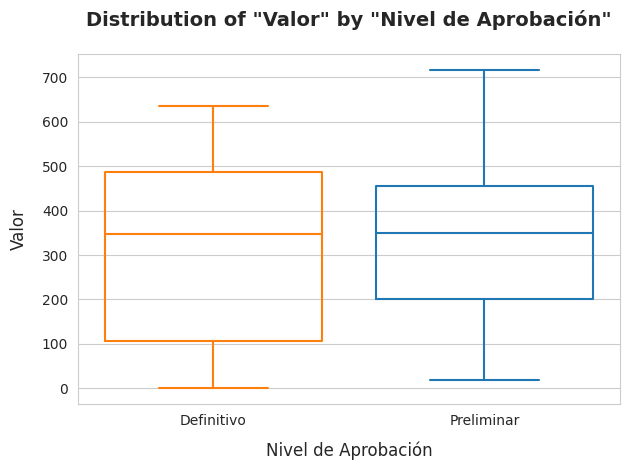

In [82]:
# Task 5: Visualization
# Create a box plot of precipitation values grouped by NivelAprobacion.

x = sns.boxplot(x='NivelAprobacion',
                y='Valor',
                data=data,
                hue="NivelAprobacion",
                fill=False,
                palette= {'Preliminar': '#1f77b4', # Azul
                          'Definitivo': '#ff7f0e'} # Naranja
                )
x.set_title('Distribution of "Valor" by "Nivel de Aprobación"', fontsize=14, fontweight='bold', pad=20)
x.set_xlabel('Nivel de Aprobación', fontsize=12, labelpad=10)
x.set_ylabel('Valor', fontsize=12, labelpad=10)

plt.tight_layout()
plt.show()

Para graficar usamos la librería Seaborn, con la cual utilizamos la función `boxplot()` la cual recibe múltiples argumentos, como obligatorios, solo los relacionados con el dataFrame a usar y los valores de los ejes x y Y. Para mejorar el aspecto del plot usamos otros argumentos opcionales del método `boxplot()`:

*   `hue="NivelAprobacion"`: Este argumento muestra agrupados los valores según las categorías de la columna "NivelAprobación".
*   `fill=False`: Por defecto, este argumento es "True" al cambiarlo a "False" el relleno de las cajas desaparece.
* `palette= {'Preliminar': '#1f77b4', # Azul 'Definitivo': '#ff7f0e'} # Naranja`: En este argumento, mediante un diccionario indicamos los colores deseados.

Con el método `x.set_title('Distribution of "Valor" by "Nivel de Aprobación"', fontsize=14, fontweight='bold', pad=20)` indicamos el título del gráfico, tamaño de la letra, fuente y posición.

Con el método `x.set_xlabel('Nivel de Aprobación', fontsize=12, labelpad=10)` indicamos el título del eje x, tamaño de la letra, fuente y posición.

Con el método `x.set_ylabel('Valor', fontsize=12, labelpad=10)` indicamos el título del eje y, tamaño de la letra, fuente y posición.

Finalmente con el método `plt.tight_layout()` ajustamos la posición del plot y finalmente con `plt.show()` imprimimos el plot.

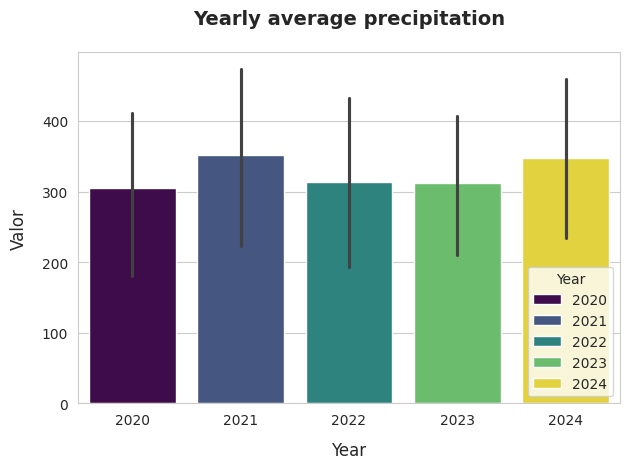

In [83]:
# Plot the yearly average precipitation using a bar plot.

x = sns.barplot(x='Year', y='Valor', data=data, hue='Year', palette='viridis')
x.set_title('Yearly average precipitation', fontsize=14, fontweight='bold', pad=20)
x.set_xlabel('Year', fontsize=12, labelpad=10)
x.set_ylabel('Valor', fontsize=12, labelpad=10)

plt.tight_layout()
plt.show()

Para graficar usamos la librería Seaborn, con la cual utilizamos la función `barplot()` la cual recibe múltiples argumentos, como obligatorios, solo los relacionados con el dataFrame a usar y los valores de los ejes x y Y. Para mejorar el aspecto del plot usamos otros argumentos opcionales del método `barplot()`:

*   `hue="Year"`: Este argumento muestra agrupados los valores según las categorías de la columna "Year".
*   `palette='Viridis'`: Viridis es una paleta de colores disponible en la librería de Seaborn

Los demás métodos cumplen la misma función explicada en la casilla precedente.

## Questions


* What happens to rows that are not present in the original DataFrame when reindexing?

Si el nuevo índice incluye filas que no se encontraban en el dataFrame inicial, `pandas` creará la nuevas filas con valores nulos o `NaN` por defecto.

* How can you handle missing values created during reindexing?

El método `reindex()` permite especificar cómo rellenar aquellos valores vacíos usando el parámetro opcional `fill_value` al cual podremos asignarle valores para que rellene los nulos o `NaN`. Otra manera es hacer uso del método `fillna("value", inplace=True)` después de ejecutar el método `reindex()` de esta manera se reemplazarán los valores `NaN` por el que se indique. Una adicional es mediante el método `interpolate()` el cual realizará una interpolación los datos existentes para rellenar los faltantes.

* What is the difference between loc and iloc?

El método `loc()` selecciona datos por etiquetas o nombres de las filas y columnas. Funciona con nombres explícitos, como los nombres de las columnas o los índices de las filas y además es inclusivo en los rangos. Por el contrario el método `iloc()` selecciona datos por índices (posiciones) de las filas y columnas. Este método es exclusivo en los rangos.

* How can you combine multiple conditions to filter data?

Utilizando `pandas` se pueden combinar múltiples condicionales para realizar filtros de datos utilizando los operadores lógicos, algunos de ellos son `&` ambas condiciones deben ser verdaderas, `|` al menos una condición debe ser verdadera, o, `~` que niega la condición.